In [1]:
import pandas as pd
import seaborn as sns
games = pd.read_json('games.json')

In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97410 entries, 0 to 97409
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        97410 non-null  int64  
 1   name                      97404 non-null  object 
 2   release_date              97410 non-null  object 
 3   estimated_owners          97410 non-null  object 
 4   peak_ccu                  97410 non-null  int64  
 5   required_age              97410 non-null  int64  
 6   price                     97410 non-null  float64
 7   dlc_count                 97410 non-null  int64  
 8   main_description          92540 non-null  object 
 9   supported_languages       97410 non-null  object 
 10  full_audio_languages      97410 non-null  object 
 11  reviews                   10125 non-null  object 
 12  header_image              97410 non-null  object 
 13  website                   42737 non-null  object 
 14  suppor

In [3]:
sample = games[games['ID'] == 22380]
sample

,ID,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,main_description,supported_languages,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,packages,developers,publishers,categories,genres,tags,screenshots
1025,22380,Fallout: New Vegas,"Oct 19, 2010",2000000 - 5000000,5776,16,9.99,0,Welcome to Vegas. New Vegas. It’s the kind of ...,"['English', 'French', 'German', 'Italian', 'Sp...",...,3044,112,976,153,Obsidian Entertainment,Bethesda Softworks,"Single-player,Steam Achievements,Partial Contr...","Action,RPG","Open World,RPG,Post-apocalyptic,Singleplayer,M...",https://cdn.akamai.steamstatic.com/steam/apps/...


<AxesSubplot:xlabel='price', ylabel='metacritic_score'>

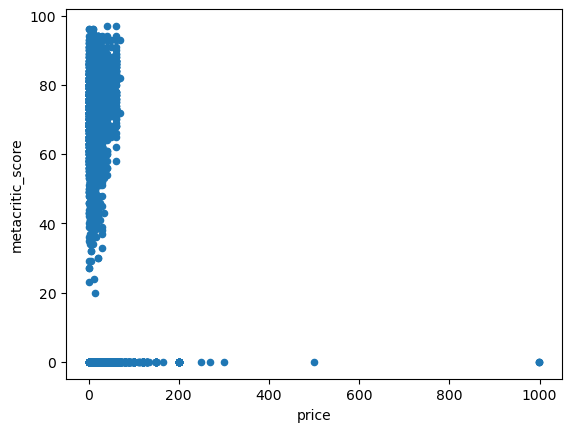

In [4]:
games.plot.scatter(x ='price', y= 'metacritic_score', s=None, c=None)

In [5]:
games['price'].max()

999.98

There are a few outliers in price.The Leverage game costs $999 whixh is way higher than most video games. The avergae price for games is approximately $7

In [6]:
# index is 81901
# index is 82971
# index is 26936
gamesRemoved = games.drop([81901, 82971, 26936])
gamesRemoved = gamesRemoved.reset_index()

<AxesSubplot:xlabel='price', ylabel='metacritic_score'>

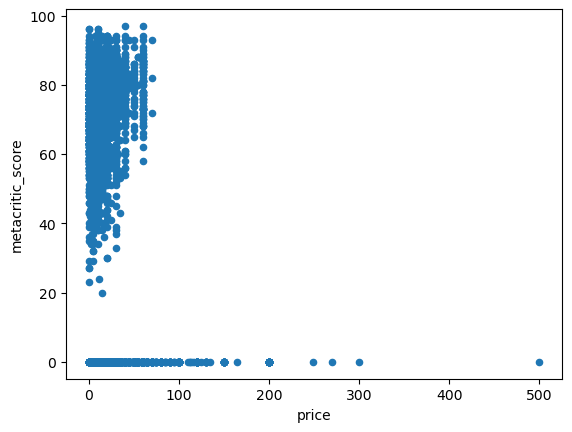

In [7]:
gamesRemoved.plot.scatter(x ='price', y= 'metacritic_score', s=None, c=None)

<AxesSubplot:xlabel='price', ylabel='recommendations'>

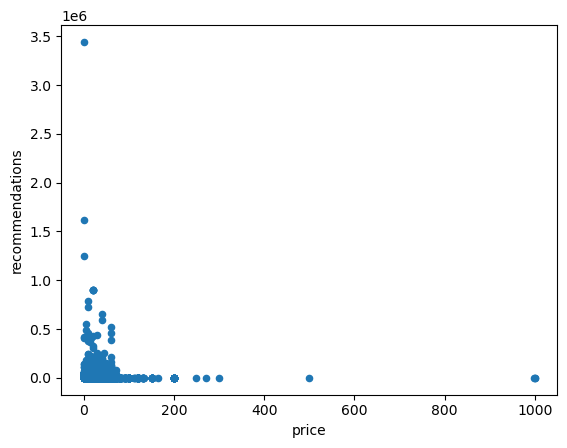

In [8]:
games.plot.scatter(x ='price', y= 'recommendations', s=None, c=None)

<AxesSubplot:xlabel='price', ylabel='recommendations'>

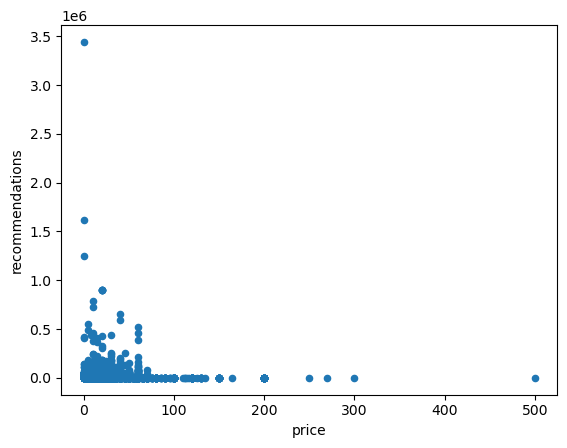

In [9]:
gamesRemoved.plot.scatter(x ='price', y= 'recommendations', s=None, c=None)

In [10]:
gamesRemoved = gamesRemoved.drop([46158])
gamesRemoved = gamesRemoved.reset_index()

<AxesSubplot:xlabel='price', ylabel='recommendations'>

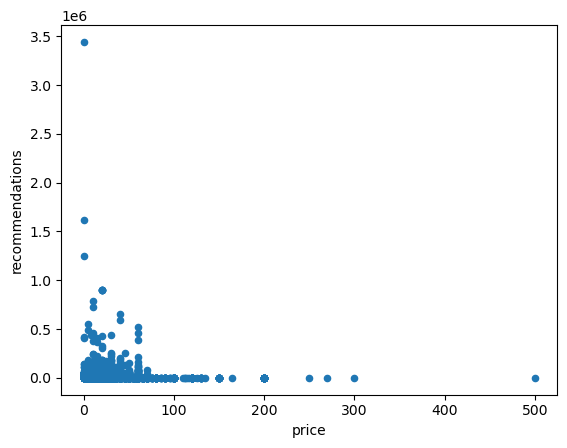

In [11]:
gamesRemoved.plot.scatter(x ='price', y= 'recommendations', s=None, c=None)

<AxesSubplot:xlabel='positive', ylabel='negative'>

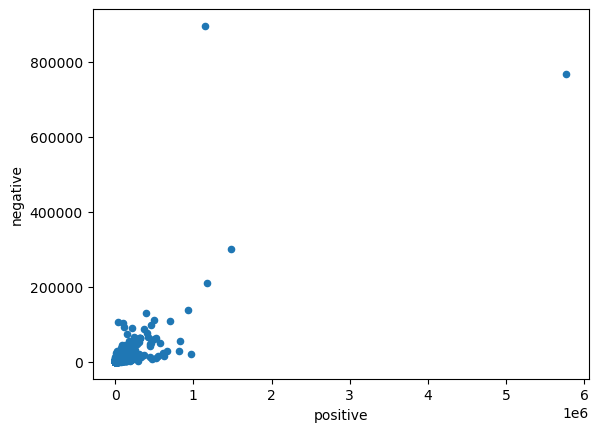

In [12]:
games.plot.scatter(x ='positive', y= 'negative', s=None, c=None)

In [13]:
print(games['positive'].idxmax())
print(games['negative'].idxmax())

46158
8885


In [14]:
gamesCleanPosNeg = games.drop([46158, 8885])

<AxesSubplot:xlabel='positive', ylabel='negative'>

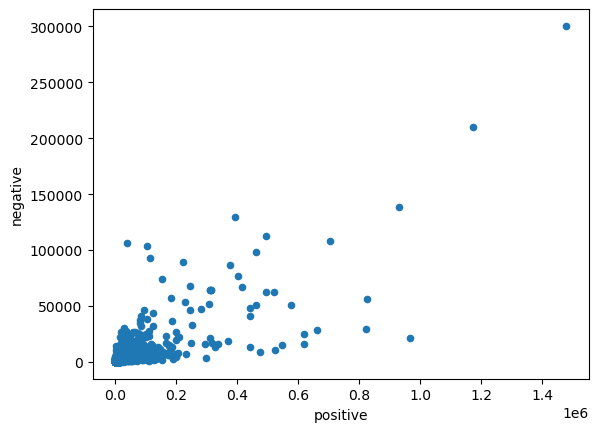

In [15]:
gamesCleanPosNeg.plot.scatter(x ='positive', y= 'negative', s=None, c=None)

In [16]:
games.corr(method='pearson')

,ID,peak_ccu,required_age,price,dlc_count,windows,mac,linux,metacritic_score,user_score,positive,negative,score_rank,achievements,recommendations,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,packages
ID,1.000000,-0.008097,-0.103954,-0.066164,NaN,0.007552,-0.201905,-0.139542,-0.263051,-0.018262,-0.046919,-0.038944,0.152725,-0.061747,-0.049229,-0.089796,-0.038627,-0.055848,-0.036843
peak_ccu,-0.008097,1.000000,0.028416,0.040309,NaN,0.000384,0.002614,0.003509,0.038814,-0.000429,0.469666,0.397728,-0.254030,0.005689,0.393734,0.106338,0.082295,0.019487,0.055837
required_age,-0.103954,0.028416,1.000000,0.094271,NaN,-0.006858,-0.002783,0.001357,0.195588,0.079026,0.067499,0.065021,0.079917,0.005948,0.095525,0.049940,0.057022,0.019173,0.053529
price,-0.066164,0.040309,0.094271,1.000000,NaN,-0.015266,0.033587,0.026972,0.135616,-0.000489,0.029094,0.024773,0.281748,0.008316,0.042239,0.059669,0.064176,0.039428,0.063011
dlc_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
windows,0.007552,0.000384,-0.006858,-0.015266,NaN,1.000000,-0.029614,-0.005024,0.003688,0.000377,0.000657,0.000544,NaN,0.001790,0.000731,0.001334,0.000984,0.000882,0.000973
mac,-0.201905,0.002614,-0.002783,0.033587,NaN,-0.029614,1.000000,0.565814,0.113546,0.003431,0.025408,0.011232,-0.123797,0.012854,0.021950,0.031244,0.006026,0.017776,0.004798
linux,-0.139542,0.003509,0.001357,0.026972,NaN,-0.005024,0.565814,1.000000,0.090449,0.006564,0.026424,0.011756,-0.005814,0.016100,0.023032,0.021541,0.004100,0.011264,0.001450
metacritic_score,-0.263051,0.038814,0.195588,0.135616,NaN,0.003688,0.113546,0.090449,1.000000,-0.001304,0.118661,0.080653,0.196195,0.018802,0.123803,0.110707,0.109952,0.046805,0.107317
user_score,-0.018262,-0.000429,0.079026,-0.000489,NaN,0.000377,0.003431,0.006564,-0.001304,1.000000,-0.000642,-0.000531,0.941245,0.002435,-0.000510,0.000269,0.000503,0.000460,0.000385


In [17]:
subGames = games[['positive', 'negative']]
subGames.corr(method = 'pearson')

,positive,negative
positive,1.000000,0.782384
negative,0.782384,1.000000


Looking at the scatterplot for positive and negative reviews there appears to be a positive linear relationship. There are a few outliers toconsider. With outliers the correlation coefficient is 0.78 which means that the relationship of between positive and negative reviews is strong and positive. This means that as the number of positive reviews for a game increase the amount of negative reviews decreases. 

### What is the relationship between average playtime (forever) and user score?
There is no relationship.

<AxesSubplot:xlabel='user_score', ylabel='average_playtime_forever'>

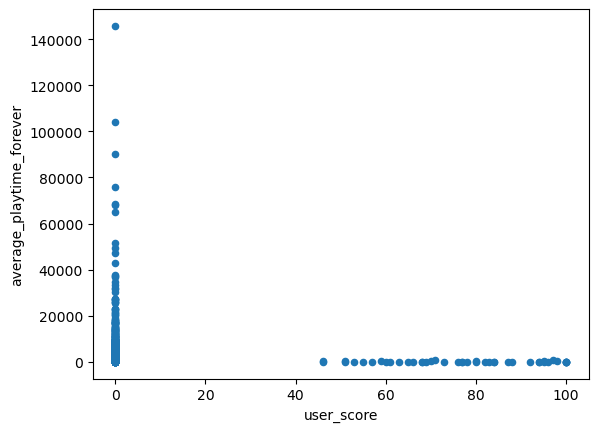

In [18]:
games.plot.scatter(x ='user_score', y= 'average_playtime_forever', s=None, c=None)

In [19]:
games['user_score'].corr(games['average_playtime_forever'])

0.00026864158583680465

### What is the relationship between metacritic score and user score?
No relationship

<AxesSubplot:xlabel='user_score', ylabel='metacritic_score'>

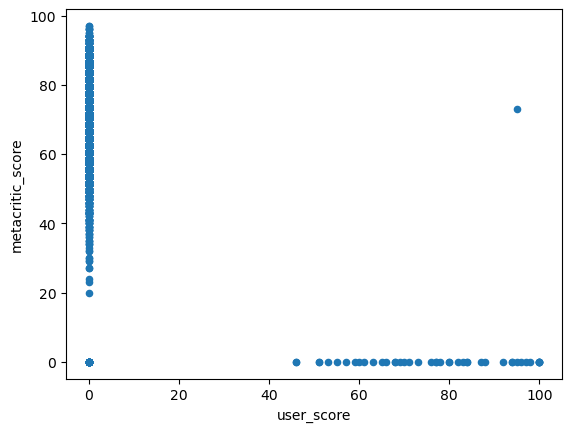

In [20]:
games.plot.scatter(x ='user_score', y= 'metacritic_score', s=None, c=None)

### What is the relationship between price and user score?

KeyError: ''

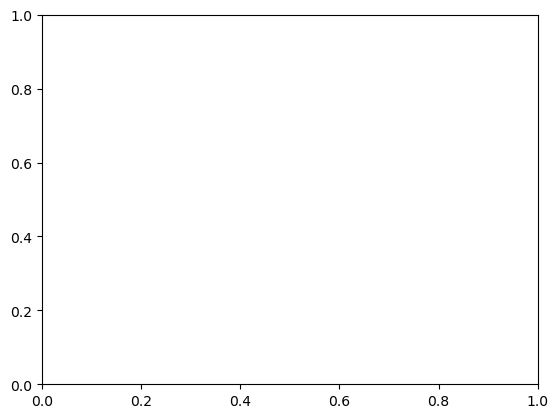

In [21]:
games.plot.scatter(x ='', y= 'user_score', s=None, c=None)